<a href="https://colab.research.google.com/github/Philocreation/My_Deep_learning/blob/main/My%20kaggle/stroe_sales_forecast(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference from : https://www.kaggle.com/c/store-sales-time-series-forecasting/leaderboard

copy from : https://github.com/dhrim/MDC_2021/blob/master/material/deep_learning/practice/20220112_predicting_parking_tuning.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# 데이터 불러오기 

In [3]:
!unzip -y /content/drive/MyDrive/store-sales-time-series-forecasting.zip

Archive:  /content/drive/MyDrive/store-sales-time-series-forecasting.zip
replace holidays_events.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: holidays_events.csv     
replace oil.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: oil.csv                 
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace stores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: stores.csv              
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
replace transactions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: transactions.csv        


In [41]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [42]:
train_df.head(1)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0


In [43]:
test_df.head(1)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0


In [44]:
train_data_count = len(train_df)
test_data_count = len(test_df)

print(train_data_count, test_data_count)

3000888 28512


In [45]:
test_df.insert(4,'sales',0.0, allow_duplicates=False)

In [46]:
test_df.head(1)

,id,date,store_nbr,family,sales,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0.0,0


In [72]:
print(len(train_df), len(test_df))
df = train_df.append(test_df)
print(len(df))

3000888 28512
3029400


# 결측치 처리 

In [73]:
print(df.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029400 entries, 0 to 28511
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 161.8+ MB
None


# 카테고리성 데이터 변환

In [75]:
df['family'] = df['family'].astype('category')
df['family'+'_code'] = df['family'].cat.codes

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029400 entries, 0 to 28511
Data columns (total 7 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int64   
 1   date         object  
 2   store_nbr    int64   
 3   family       category
 4   sales        float64 
 5   onpromotion  int64   
 6   family_code  int8    
dtypes: category(1), float64(1), int64(3), int8(1), object(1)
memory usage: 144.5+ MB
None


# 카테고리 컬럼을 one-hot인코딩 

In [77]:
df = pd.get_dummies(df, columns=['family_code'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029400 entries, 0 to 28511
Data columns (total 39 columns):
 #   Column          Dtype   
---  ------          -----   
 0   id              int64   
 1   date            object  
 2   store_nbr       int64   
 3   family          category
 4   sales           float64 
 5   onpromotion     int64   
 6   family_code_0   uint8   
 7   family_code_1   uint8   
 8   family_code_2   uint8   
 9   family_code_3   uint8   
 10  family_code_4   uint8   
 11  family_code_5   uint8   
 12  family_code_6   uint8   
 13  family_code_7   uint8   
 14  family_code_8   uint8   
 15  family_code_9   uint8   
 16  family_code_10  uint8   
 17  family_code_11  uint8   
 18  family_code_12  uint8   
 19  family_code_13  uint8   
 20  family_code_14  uint8   
 21  family_code_15  uint8   
 22  family_code_16  uint8   
 23  family_code_17  uint8   
 24  family_code_18  uint8   
 25  family_code_19  uint8   
 26  family_code_20  uint8   
 27  family_code_21

# 불필요한 컬럼 삭제 

In [81]:
df.drop(columns=['date','family'], inplace=True)

# Normalization

In [82]:
y_df = df['sales']
x_df = df.drop(columns=['sales'])

In [83]:
x_df = (x_df - x_df.min()) / (x_df.max() - x_df.min())

In [84]:
print(len(y_df))
print(y_df.value_counts())

3029400
0.000        967642
1.000        115291
2.000         85959
3.000         68575
4.000         57846
              ...  
2338.588          1
264.899           1
916.955           1
16283.000         1
775.626           1
Name: sales, Length: 379610, dtype: int64


In [85]:
y_min = y_df.min()
y_max = y_df.max()
y_df = (y_df - y_min) / (y_max - y_min)

# numpy로 변환

In [86]:
 x = x_df.to_numpy()
 y = y_df.to_numpy()

 print(x.shape)
 print(y.shape)

(3029400, 36)
(3029400,)


# train / test 분리 

In [87]:
train_x, test_x = x[:train_data_count], x[:test_data_count]
train_y, test_y = y[:train_data_count], y[:test_data_count]

# 모델 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                1184      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,525
Trainable params: 1,525
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
21100/21100 [==============================] - 61s 3ms/step - loss: 3.3809e-04 - mae: 0.0108 - val_loss: 1.3726e-04 - val_mae: 0.0074
Epoch 2/10
21100/21100 [==============================] - 60s 3ms/step - loss: 6.8212e-05 - mae: 0.0047 - val_loss: 1.0929e-04 - val_mae: 0.0062
Epoch 3/10
21100/21100 [==

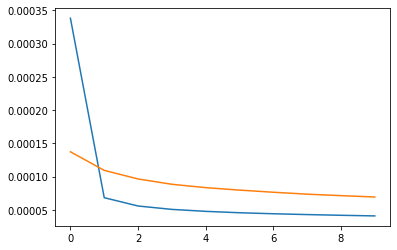

891/891 [==============================] - 2s 2ms/step - loss: 3.1519e-05 - mae: 0.0030
loss= 3.1519466574536636e-05
mae= 0.003031820524483919


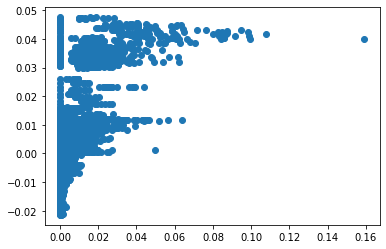

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_x.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상
    verbose=1,
    patience=50)         # 중지까지의 여유분

history = model.fit(train_x, train_y, epochs=10, verbose=1, batch_size=128, validation_split=0.1,
                    callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

# submision 파일 파악 

In [90]:
!head sample_submission.csv

id,sales
3000888,0.0
3000889,0.0
3000890,0.0
3000891,0.0
3000892,0.0
3000893,0.0
3000894,0.0
3000895,0.0
3000896,0.0


In [91]:
!head test.csv

id,date,store_nbr,family,onpromotion
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
3000893,2017-08-16,1,BREAD/BAKERY,12
3000894,2017-08-16,1,CELEBRATION,0
3000895,2017-08-16,1,CLEANING,25
3000896,2017-08-16,1,DAIRY,45


In [92]:
!wc sample_submission.csv
!wc test.csv

 28513  28513 342153 sample_submission.csv
  28513   47521 1022269 test.csv


# 예측값 구하기 

In [93]:
y_ = model.predict(test_x)
recovered_y = y_ * (y_max - y_min) + y_min

In [94]:
test_df['sales'] = recovered_y

In [95]:
result_df = test_df

In [96]:
result_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,710.521667,0
1,3000889,2017-08-16,1,BABY CARE,142.751984,0
2,3000890,2017-08-16,1,BEAUTY,142.751984,2
3,3000891,2017-08-16,1,BEVERAGES,3248.931885,20
4,3000892,2017-08-16,1,BOOKS,142.751984,0


In [97]:
result_df = result_df.reset_index()

In [98]:
result_df = result_df[['id', 'sales']]

In [99]:
result = result_df.to_numpy()
print(result.shape)
print(result[:5])

(28512, 2)
[[3.00088800e+06 7.10521667e+02]
 [3.00088900e+06 1.42751984e+02]
 [3.00089000e+06 1.42751984e+02]
 [3.00089100e+06 3.24893188e+03]
 [3.00089200e+06 1.42751984e+02]]


In [100]:
result_map = {}
for code, value in result:
    result_map[code] = value

print(result_map)

{3000888.0: 710.5216674804688, 3000889.0: 142.75198364257812, 3000890.0: 142.75198364257812, 3000891.0: 3248.931884765625, 3000892.0: 142.75198364257812, 3000893.0: 2008.0733642578125, 3000894.0: 142.75198364257812, 3000895.0: 78.76004028320312, 3000896.0: 142.75198364257812, 3000897.0: 142.75198364257812, 3000898.0: -765.3522338867188, 3000899.0: 407.6361083984375, 3000900.0: 5064.2646484375, 3000901.0: 142.75198364257812, 3000902.0: 142.75198364257812, 3000903.0: -276.9090881347656, 3000904.0: 720.3894653320312, 3000905.0: 142.75198364257812, 3000906.0: 142.75198364257812, 3000907.0: 142.75198364257812, 3000908.0: 142.75198364257812, 3000909.0: 142.75198364257812, 3000910.0: -2676.504150390625, 3000911.0: 142.75198364257812, 3000912.0: 365.8101501464844, 3000913.0: 1431.891845703125, 3000914.0: 418.7514343261719, 3000915.0: -328.6523742675781, 3000916.0: 142.75198364257812, 3000917.0: 686.8236083984375, 3000918.0: 142.75198364257812, 3000919.0: 1552.9342041015625, 3000920.0: 142.7519

# submission 파일 읽기

In [125]:
submission_df = pd.read_csv("sample_submission.csv")

In [126]:
submission_df.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [116]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


# submission 값 채우기

In [117]:
submission_id = submission_df.id.to_numpy()

submission = []

for id in submission_id:
    submission.append([id, result_map[id]])

submission = np.array(submission)

submission_df = pd.DataFrame(submission, columns=["id", "sales"])

submission_df.head()

,id,sales
0,3000888.0,710.521667
1,3000889.0,142.751984
2,3000890.0,142.751984
3,3000891.0,3248.931885
4,3000892.0,142.751984


# submission 파일 저장

In [127]:
submission_df['id'] = submission_df['id'].astype('int32')

In [128]:
print(submission_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int32  
 1   sales   28512 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 334.2 KB
None


In [129]:
submission_df.to_csv("submission.csv", index=False)